In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [21]:
enrollment = pd.read_csv("~/Desktop/chia2018/2017/datasheets/enrollment_by_product.csv")
#Reading the dataset in a dataframe using Pandas
enrollment

,Funding Type,Product Type,months_2014,months_2015,months_2016
0,Fully-Insured,HMO,14876571,15226082,15333636
1,Fully-Insured,Other,48168,40790,36942
2,Fully-Insured,POS,229036,303006,290166
3,Fully-Insured,PPO,5384038,5628226,5896844
4,Fully-Insured,Total,20537813,21198104,21557588


In [22]:
months = enrollment[enrollment.columns[1:5]]
mth_cols = ['months_2014','months_2015','months_2016']
months

,Product Type,months_2014,months_2015,months_2016
0,HMO,14876571,15226082,15333636
1,Other,48168,40790,36942
2,POS,229036,303006,290166
3,PPO,5384038,5628226,5896844
4,Total,20537813,21198104,21557588


In [23]:
premiums = pd.read_csv("~/Desktop/chia2018/2017/datasheets/premiums_by_product.csv")
pre_cols = ['agg_premiums_2014','agg_premiums_2015','agg_premiums_2016', 'pmpm_2014','pmpm_2015','pmpm_2016']

premiums[pre_cols] = premiums[pre_cols].replace({'\$': '', ',': ''}, regex=True)
premiums[pre_cols] = premiums[pre_cols].apply(pd.to_numeric)

agg_premiums = premiums[premiums.columns[1:5]]
agg_cols = ['agg_premiums_2014','agg_premiums_2015','agg_premiums_2016']
premiums

,Funding Type,Product Type,agg_premiums_2014,agg_premiums_2015,agg_premiums_2016,pmpm_2014,pmpm_2015,pmpm_2016
0,Fully-Insured,HMO,6.611407e+09,6.858607e+09,7.063017e+09,444.42,450.45,460.62
1,Fully-Insured,Other,3.693389e+07,3.350041e+07,3.053825e+07,766.77,821.29,826.65
2,Fully-Insured,POS,1.137266e+08,1.465182e+08,1.399384e+08,496.54,483.55,482.27
3,Fully-Insured,PPO,2.368609e+09,2.554418e+09,2.772592e+09,439.93,453.86,470.18
4,Fully-Insured,Total,9.130677e+09,9.593044e+09,1.000609e+10,444.58,452.54,464.16


In [24]:
pmpm = pd.DataFrame(columns = ['Product Type','pmpm_2014','pmpm_2015','pmpm_2016'])
pmpm['Product Type'] = enrollment['Product Type']
pmpm['pmpm_2014'] = agg_premiums['agg_premiums_2014']/months['months_2014']
pmpm['pmpm_2015'] = agg_premiums['agg_premiums_2015']/months['months_2015']
pmpm['pmpm_2016'] = agg_premiums['agg_premiums_2016']/months['months_2016']
pmpm

,Product Type,pmpm_2014,pmpm_2015,pmpm_2016
0,HMO,444.417419,450.451234,460.622479
1,Other,766.772274,821.289737,826.653900
2,POS,496.544692,483.548699,482.269990
3,PPO,439.931710,453.858526,470.182428
4,Total,444.578827,452.542565,464.156123


In [26]:
cols = ['pmpm_2014','pmpm_2015','pmpm_2016']
loop_pmpm = pd.DataFrame(columns = ['Product Type'] + cols)
for i in range(3):
    agg = agg_cols[i]
    mth = mth_cols[i]
    loop_pmpm[cols[i]] = agg_premiums[agg]/months[mth]
loop_pmpm['Product Type'] = enrollment['Product Type']

loop_pmpm

,Product Type,pmpm_2014,pmpm_2015,pmpm_2016
0,HMO,444.417419,450.451234,460.622479
1,Other,766.772274,821.289737,826.653900
2,POS,496.544692,483.548699,482.269990
3,PPO,439.931710,453.858526,470.182428
4,Total,444.578827,452.542565,464.156123


In [27]:
loop_pmpm['pmpm_2016']

0    460.622479
1    826.653900
2    482.269990
3    470.182428
4    464.156123
Name: pmpm_2016, dtype: float64

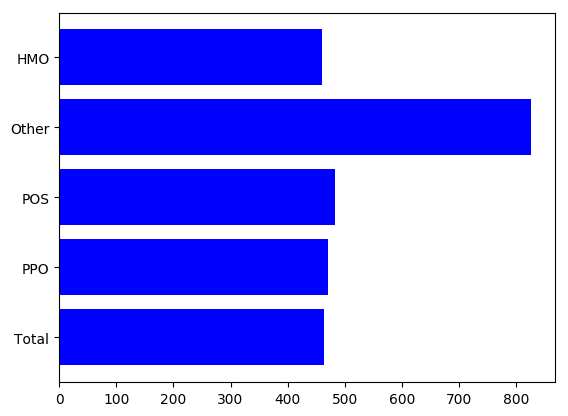

In [28]:


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ax.barh(loop_pmpm['Product Type'], loop_pmpm['pmpm_2016'], align='center',
        color='blue')
ax.set_yticks(loop_pmpm['Product Type'])

ax.set_yticklabels(loop_pmpm['Product Type'])
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()